Data focused considerations:

- Who created the dataset?
- How was the dataset created?
- What transformations were used?
- What intent does the dataset have?
- Possible unintentional consequences?
- Is the dataset biased?
- Are there ethical issues with the dataset?

## Prepare data
### ETL (Extract, Transform and Load)

## Loading

In [0]:
import torch
import torchvision #provides popular datasets, transformations, and architectures for images
import torchvision.transforms as transforms
batch_size = 128

In pytorch, Dataset is an abstract class, representing a dataset.
Example of a custom Dataset class
```python
class custom(Dataset):
  def __init__(self, csv_file):
    self.data = pd.read_csv(csv_file)

  def __getitem__(self, index):
    r = self.data.iloc[index]
    label = torch.tensor(r.label, dtype=torch.long)
    text = torch.tensor(r.text)
    return text, label

  def __len__(self):
    return len(self.data)
```

In [0]:
train_set = torchvision.datasets.FashionMNIST(
    root='data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

type(train_set)

  0%|          | 40960/26421880 [00:00<01:05, 402149.55it/s]

26427392it [00:00, 81840733.06it/s]                            


Extracting data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 612929.20it/s]
 15%|█▌        | 663552/4422102 [00:00<00:00, 6188397.18it/s]

Extracting data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:00, 30264058.50it/s]                           
8192it [00:00, 214377.22it/s]


Extracting data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz
Extracting data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


torchvision.datasets.mnist.FashionMNIST

In [0]:
train_loader=torch.utils.data.DataLoader(train_set, batch_size=batch_size)

In [0]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [0]:
test_set = torchvision.datasets.FashionMNIST(
    root='data/FashionMNIST',
    train=False,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

test_loader=torch.utils.data.DataLoader(test_set, batch_size=batch_size)

## See Data

In [0]:
import numpy as np
import matplotlib.pyplot as plt
torch.set_printoptions(linewidth=120)

In [0]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [0]:
train_set.targets.bincount() 
# number of samples in each bin/category

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [0]:
train_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

**Jeremy mentions a paper for working with class imbalance:** A systematic study of the class imbalance problem in CNN , Mateusz, Atsuto, Maciej, '18

### With dataset

In [0]:
sample = next(iter(train_set))

In [0]:
len(sample) , type(sample)

(2, tuple)

In [0]:
image, label = sample
#sequence / list unpacking

In [0]:
image.shape , label

(torch.Size([1, 28, 28]), 9)

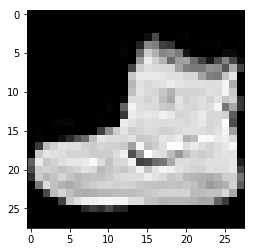

In [0]:
plt.imshow(image.squeeze(), cmap='gray');

### With dataloader

In [0]:
batch = next(iter(train_loader))

In [0]:
len(batch) , type(batch)

(2, list)

In [0]:
images, labels = batch
len(images) , len(labels)

(128, 128)

In [0]:
images.shape , labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3, 0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1, 6, 3,
        1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6, 4, 1, 1, 8, 8, 0, 1, 1, 6, 8, 1, 9, 7, 8, 8,
        9, 6, 6, 3, 1, 5, 4, 6, 7, 5, 5, 9, 2, 2, 2, 7, 6])


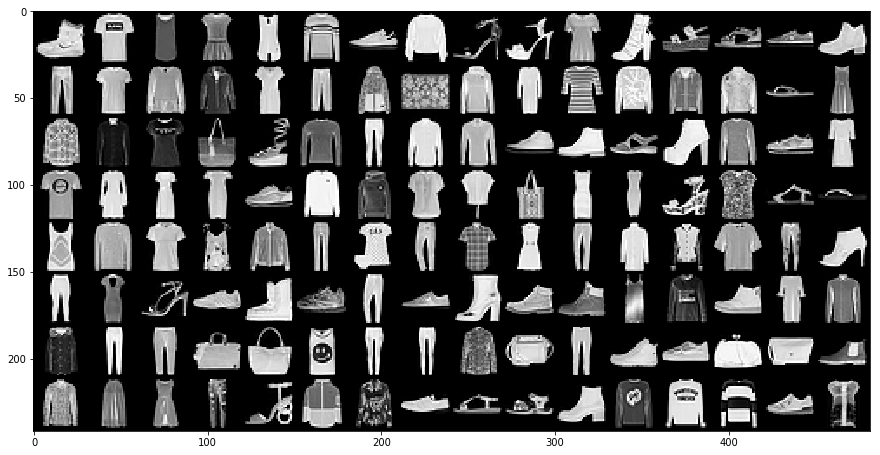

In [0]:
grid = torchvision.utils.make_grid(images, nrow=16)
#nrow: number of images in each row

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print(labels)

## Neural Net

In [0]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6 , out_channels=12 , kernel_size=5)
        #we increase the number of output channels

        self.fc1 = nn.Linear(in_features=12*4*4,out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=60)
        self.out = nn.Linear(in_features=60,out_features=10)
        #we descrease the number of nodes per layer

        #dont have to mention softmax, cuz categorical crossentropy 
        #select korlei eita selecet hoye jay
    
    def forward(self, x):
        ##implement forward method
        return x

In [0]:
network = Network()

In [0]:
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

Parameter vs Argument: 
- parament is def fun(**text**), and argument is fun(**'tanny'**);
- parameter is the local variable used as placeholder
- argument is the actual value we provided

String Representation:
- we can override pythons default string representation(of a class) by:
```python
def __repr__(self):
  return 'Custom String'
```

In [0]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [0]:
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

- There are 12 output channels, for each of the 6 input channels, each filter being of size 5x5.
- Another way to say it is: 12 channels for each 6x5x5 filters, considering 6 as the depth of the channel.

In [0]:
network.fc1.weight.shape

torch.Size([120, 192])

In [0]:
network.fc2.weight.shape

torch.Size([60, 120])

In [0]:
network.out.weight.shape

torch.Size([10, 60])

In [0]:
for param in network.parameters():
    print( param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


In [0]:
for name,param in network.named_parameters():
    print(name, '\t\t' , param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


### Linear Layer

#### Matmul

In [0]:
input_features = torch.tensor([1,2,3,4],dtype=torch.float32)

In [0]:
weight = torch.tensor([
                       [1,2,3,4],
                       [2,3,4,5],
                       [3,4,5,6]
], dtype=torch.float32)

In [0]:
weight.matmul(input_features)

tensor([30., 40., 50.])

This is literally a mapping from a 4d euclidean space, to a 3d euclidean space.

#### by pytorch Linear

In [0]:
fc = nn.Linear(in_features=4,out_features=3)

In [0]:
fc(input_features) ##using randomly initialized weight matrix

tensor([-0.3495,  0.8962, -0.1588], grad_fn=<AddBackward0>)

In [0]:
fc.weight=nn.Parameter(weight)

In [0]:
fc(input_features) #still not exact to our value, cause we have a bias being added by pytorch in Linear

tensor([29.7368, 39.9124, 50.3469], grad_fn=<AddBackward0>)

In [0]:
fc = nn.Linear(in_features=4,out_features=3,bias=False)
fc.weight=nn.Parameter(weight)
fc(input_features) #exact match

tensor([30., 40., 50.], grad_fn=<SqueezeBackward3>)

- In pytoch, calling a class like a function invokes a special funtion called `__call__(input)`. In nn.Module classes, `__call__()` inturn calls the `forward(input)` method for us.
- The extra code that pytorch runs under the call method is why we never directly run the forward method, and instead run the class as a function, i.e call the class.

## Forward method

Comparing to OOP, the init has all the attributes, NN attributes are the layers and configs. The transformation/methods are executed in the forward method.

In [0]:
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6 , out_channels=12 , kernel_size=5)
        #we increase the number of output channels

        self.fc1 = nn.Linear(in_features=12*4*4,out_features=120)
        ## number of output channels * h * w of output channel
        ## 

        self.fc2 = nn.Linear(in_features=120,out_features=60)
        self.out = nn.Linear(in_features=60,out_features=10)
        # we descrease the number of nodes per layer
    
    def forward(self, t):
        ## Convolution layers (with relu and maxpool)
        t=F.max_pool2d(F.relu(self.conv1(t)),kernel_size=2,stride=2)
        t=F.max_pool2d(F.relu(self.conv2(t)),kernel_size=2,stride=2)

        ## Flatten
        t=t.reshape(-1,12*4*4)

        ## Linear layers
        t=F.relu(self.fc1(t))
        t=F.relu(self.fc2(t))

        ## Output Layer
        t=self.out(t)
        # t=F.softmax(t,dim=1)
        #dont have to mention softmax, cuz categorical crossentropy 
        #select korlei eita selecet hoye jay

        return t

since pooling operations and activation functions do not have weight, we will not refer to them as layers, we will say they are simply operations.

## Network testing

In [31]:
torch.set_grad_enabled(False) 
# turn off dynamic graph creation, cause we arent training yet
# the gradient tracking feature is now off

In [0]:
network = Network()

In [34]:
image, label = next(iter(train_set))
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [36]:
image.unsqueeze(0).shape #adding a batch dimention

torch.Size([1, 1, 28, 28])

In [0]:
pred = network(image.unsqueeze(0))

In [38]:
pred.shape

torch.Size([1, 10])

In [42]:
pred # but these are not probabilities

tensor([[-0.0683, -0.1334, -0.0590, -0.1035,  0.0739,  0.1312,  0.1059,  0.0652, -0.0553,  0.0901]])

In [40]:
label

9

In [43]:
sp = F.softmax(pred, dim=1) # the network prediction
sp

tensor([[0.0926, 0.0867, 0.0934, 0.0894, 0.1067, 0.1130, 0.1102, 0.1058, 0.0938, 0.1085]])

Most of the classes are close to 10%, because the network is actually guessing(not trained) for the 10 classes.

In [45]:
sp.sum()

tensor(1.0000)

In [47]:
sp.argmax(dim=1) # the network prediction

tensor([5])

**Now working with batches**

In [49]:
image, label = next(iter(train_loader))
image.shape, label.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [50]:
pred = network(image)
pred.shape

torch.Size([128, 10])

In [54]:
F.softmax(pred,dim=1)

tensor([[0.0926, 0.0867, 0.0934,  ..., 0.1058, 0.0938, 0.1085],
        [0.0927, 0.0860, 0.0932,  ..., 0.1055, 0.0936, 0.1085],
        [0.0925, 0.0865, 0.0931,  ..., 0.1059, 0.0944, 0.1087],
        ...,
        [0.0924, 0.0862, 0.0933,  ..., 0.1053, 0.0932, 0.1080],
        [0.0922, 0.0864, 0.0932,  ..., 0.1057, 0.0943, 0.1080],
        [0.0928, 0.0865, 0.0933,  ..., 0.1058, 0.0939, 0.1082]])

Once again, all are near 10%

In [53]:
list(zip(F.softmax(pred,dim=1).argmax(dim=1), label))

[(tensor(5), tensor(9)),
 (tensor(5), tensor(0)),
 (tensor(5), tensor(0)),
 (tensor(5), tensor(3)),
 (tensor(5), tensor(0)),
 (tensor(5), tensor(2)),
 (tensor(5), tensor(7)),
 (tensor(5), tensor(2)),
 (tensor(5), tensor(5)),
 (tensor(5), tensor(5)),
 (tensor(5), tensor(0)),
 (tensor(5), tensor(9)),
 (tensor(5), tensor(5)),
 (tensor(5), tensor(5)),
 (tensor(5), tensor(7)),
 (tensor(5), tensor(9)),
 (tensor(5), tensor(1)),
 (tensor(5), tensor(0)),
 (tensor(5), tensor(6)),
 (tensor(5), tensor(4)),
 (tensor(5), tensor(3)),
 (tensor(5), tensor(1)),
 (tensor(5), tensor(4)),
 (tensor(5), tensor(8)),
 (tensor(5), tensor(4)),
 (tensor(5), tensor(3)),
 (tensor(5), tensor(0)),
 (tensor(5), tensor(2)),
 (tensor(5), tensor(4)),
 (tensor(5), tensor(4)),
 (tensor(5), tensor(5)),
 (tensor(5), tensor(3)),
 (tensor(5), tensor(6)),
 (tensor(5), tensor(6)),
 (tensor(5), tensor(0)),
 (tensor(5), tensor(8)),
 (tensor(5), tensor(5)),
 (tensor(5), tensor(2)),
 (tensor(5), tensor(1)),
 (tensor(5), tensor(6)),


Somehow, predicts all images to be the 5th class.

In [56]:
# How many did it get right?
F.softmax(pred,dim=1).argmax(dim=1).eq(label).sum()

tensor(14)

In [57]:
## double checking
(label==5).sum()

tensor(14)

In [0]:
def get_num_correct(preds,labels):
  # no softmax used
  return preds.argmax(dim=1).eq(labels).sum().item()

In [61]:
get_num_correct(pred,label)

14

**Must Watch:** https://www.youtube.com/watch?v=cin4YcGBh3Q&list=PLZbbT5o_s2xrfNyHZsM6ufI0iZENK9xgG&index=24
- Explains the cnn shapes.

## Test Training

In [0]:
torch.set_grad_enabled(True) #thats what it is by default

In [0]:
pred = network(image)

In [72]:
label.shape, pred.shape
## notice the shapes though

(torch.Size([128]), torch.Size([128, 10]))

In [73]:
loss = F.cross_entropy(pred,label)
loss.item()

2.307274341583252

### Calculate the gradients

In [74]:
print(network.conv1.weight.grad)

None


In [0]:
loss.backward()

In [76]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

### Optimizer

In [0]:
import torch.optim as optim

In [0]:
optimizer = optim.Adam(network.parameters(), lr=0.01)

In [80]:
loss.item()

2.307274341583252

In [81]:
get_num_correct(pred,label)

14

In [0]:
optimizer.step()

In [91]:
image.shape

torch.Size([128, 1, 28, 28])

In [96]:
### Now check if updated weights helped learn anything
pred = network(image)
loss = F.cross_entropy(pred,label)
loss.item()

2.273145914077759

In [97]:
get_num_correct(pred,label)

26

## Training

In [0]:
network = Network()

In [0]:
network = network.to('cuda')

In [0]:
num_epochs = 20

In [0]:
import torch.optim as optim
optimizer = optim.Adam(network.parameters(), lr=0.01)

In [0]:
# #smaller set
# train_indices = [i for i in range (15000)]
# test_indices = [i for i in range (2500)]
# ss = torch.utils.data.sampler.SubsetRandomSampler
# train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, sampler=ss(train_indices))
# test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, sampler=ss(test_indices))

In [0]:
def get_num_correct(preds,labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [0]:
count = 0
iteration_list = []

train_loss_list = []
valid_loss_list = []
train_accuracy_list = []
valid_accuracy_list = []

In [145]:
for epoch in range(num_epochs):

    total_train_loss = 0
    total_train_correct = 0
    total_train = 0

    for i, data in enumerate(train_loader):

        network.train()

        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')

        outputs = network(inputs) # Forward propagation
        loss = F.cross_entropy(outputs, labels) # Calculate softmax and cross entropy loss
        
        optimizer.zero_grad()
        loss.backward()# Calculating gradients
        optimizer.step()# Update parameters
        
        count += 1
        total_train_loss += loss.item()*len(labels)
        trloss=loss.item()
        total_train_correct += get_num_correct(outputs,labels)
        total_train += len(labels)

        # TEST LOSS and ACCURACY
        if count%50 == 0:
            with torch.no_grad():

                network.eval() #for dropout, batchnorm type things

                total_valid_correct = 0
                total_valid = 0
                total_valid_loss = 0

                for data in test_loader:

                    images, labels = data
                    images = images.to('cuda')
                    labels = labels.to('cuda')

                    outputs = network(images)
                    loss = F.cross_entropy(outputs, labels)

                    total_valid_loss += loss.item()*len(labels)
                    vlloss=loss.item()
                    total_valid += len(labels)
                    total_valid_correct += get_num_correct(outputs, labels)

            valid_accuracy = 100 * total_valid_correct / float(total_valid)
            train_accuracy = 100 * total_train_correct / float(total_train)

            train_loss_list.append(total_train_loss/float(total_train))
            valid_loss_list.append(total_valid_loss/float(total_valid))
            valid_accuracy_list.append(valid_accuracy)
            train_accuracy_list.append(train_accuracy)
            iteration_list.append(count)

            if count%200 == 0:
                print('Iteration/Epoch: {}/{}  Train_Loss: {:.4f} Train_Acc: {:.4f}% Test_Loss: {:.4f}  Test_Acc: {:.4f}%'
                      .format(i,epoch+1,train_loss_list[-1],train_accuracy_list[-1],valid_loss_list[-1],valid_accuracy_list[-1]))

print('Finished Training')

#abar run dile it will continue training

Iteration/Epoch: 199/1  Train_Loss: 0.7506 Train_Acc: 70.6797% Test_Loss: 0.5603  Test_Acc: 79.3400%
Iteration/Epoch: 399/1  Train_Loss: 0.6217 Train_Acc: 76.2129% Test_Loss: 0.4454  Test_Acc: 83.7600%
Iteration/Epoch: 130/2  Train_Loss: 0.4270 Train_Acc: 84.4287% Test_Loss: 0.4590  Test_Acc: 83.0500%
Iteration/Epoch: 330/2  Train_Loss: 0.4143 Train_Acc: 84.8282% Test_Loss: 0.4168  Test_Acc: 84.4800%
Iteration/Epoch: 61/3  Train_Loss: 0.3712 Train_Acc: 86.2651% Test_Loss: 0.3844  Test_Acc: 85.9700%
Iteration/Epoch: 261/3  Train_Loss: 0.3656 Train_Acc: 86.3788% Test_Loss: 0.3744  Test_Acc: 85.8000%
Iteration/Epoch: 461/3  Train_Loss: 0.3611 Train_Acc: 86.6410% Test_Loss: 0.3938  Test_Acc: 85.3500%
Iteration/Epoch: 192/4  Train_Loss: 0.3516 Train_Acc: 87.0547% Test_Loss: 0.3831  Test_Acc: 86.5600%
Iteration/Epoch: 392/4  Train_Loss: 0.3441 Train_Acc: 87.3887% Test_Loss: 0.3665  Test_Acc: 87.2400%
Iteration/Epoch: 123/5  Train_Loss: 0.3339 Train_Acc: 88.0733% Test_Loss: 0.3620  Test_Acc: 

## Visualize

**If your training loss is much lower than validation loss then this means the network might be overfitting. Solutions to this are to decrease your network size, or to increase dropout. ... If training loss << validation loss , it is overfitting; if roughly training loss = validation loss , it is underfitting.**

- Underfitting – Validation and training error high
- Overfitting – Validation error is high, training error low
- Good fit – Validation error low, slightly higher than the training error
- Unknown fit - Validation error low, training error 'high'

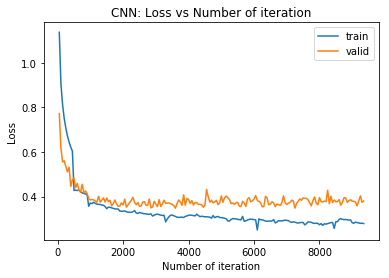

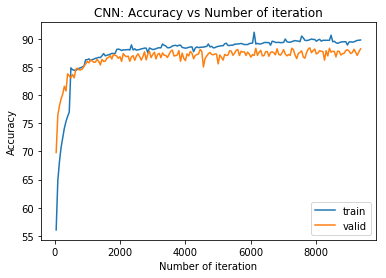

In [146]:
# visualization loss 
plt.plot(iteration_list,train_loss_list,label='train')
plt.plot(iteration_list,valid_loss_list,label='valid')
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.legend()
plt.show()

# visualization accuracy 
plt.plot(iteration_list,train_accuracy_list,label='train')
plt.plot(iteration_list,valid_accuracy_list,label='valid')
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.legend()
plt.show()

------->   My model is underfitting, it can improve more if the model is improved.

## Prediction (no_grad)

In [147]:
len(train_set), len(test_set)

(60000, 10000)

In [0]:
def get_all_preds(model, loader):
  all_preds = torch.tensor([]).to('cuda')
  for images, labels in loader:
    images = images.to('cuda')
    labels = labels.to('cuda')
    preds = model(images)
    all_preds = torch.cat((all_preds,preds),dim=0) #appending the predictions
  return all_preds

In [151]:
prediction_loader = torch.utils.data.DataLoader(train_set,batch_size=10000)
train_preds = get_all_preds(network,prediction_loader)
train_preds.shape

torch.Size([60000, 10])

In [153]:
## same thing for validation set
prediction_loader = torch.utils.data.DataLoader(test_set,batch_size=10000)
valid_preds = get_all_preds(network,prediction_loader)
valid_preds.shape

torch.Size([10000, 10])

In [154]:
print(train_preds.requires_grad)

True


In [156]:
print(train_preds.grad)

None


- So we see, although requires grad is True, we did not get grad values, thats because we didnt even call .backward()

In [158]:
train_preds.grad_fn 
#the function that let to the tensors creation
#this means, the graph is being tracked
#but we shoulnt want this overhead

In [159]:
## solution is:
## besides separately turning off the grad tracking
with torch.no_grad():
  prediction_loader = torch.utils.data.DataLoader(train_set,batch_size=10000)
  train_preds = get_all_preds(network,prediction_loader)
  print(train_preds.shape)
  prediction_loader = torch.utils.data.DataLoader(test_set,batch_size=10000)
  valid_preds = get_all_preds(network,prediction_loader)
  print(valid_preds.shape)

torch.Size([60000, 10])
torch.Size([10000, 10])


In [165]:
print(train_preds.requires_grad)

False


In [166]:
print(train_preds.grad)

None


In [168]:
print(train_preds.grad_fn)

None


Another way to turn off grads is 
```python
@torch.no_grad()
def get_all_preds(model, loader):
  ---
  return all_preds
```
So anytime this function is called, its gradient tracking is going to be locally called off!

In [0]:
train_preds=train_preds.to('cpu')
valid_preds=valid_preds.to('cpu')

In [164]:
print('Train Acc: ',get_num_correct(train_preds,train_set.targets)/len(train_set))
print('Valid Acc: ',get_num_correct(valid_preds,test_set.targets)/len(test_set))

Train Acc:  0.8948833333333334
Valid Acc:  0.8769


## Confusion Matrix

In [0]:
stacked = torch.stack( (train_set.targets,train_preds.argmax(dim=1))  ,dim=1)

In [170]:
stacked.shape

torch.Size([60000, 2])

In [171]:
stacked[:5]

tensor([[9, 9],
        [0, 0],
        [0, 0],
        [3, 3],
        [0, 0]])

In [172]:
stacked[0].tolist()

[9, 9]

In [173]:
cmt = torch.zeros(10,10,dtype=torch.int64)
cmt

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [0]:
for p in stacked:
  j,k = p.tolist() #tensor to list
  cmt[j,k]+=1

In [177]:
cmt

tensor([[5483,    0,  104,   90,    8,    0,  287,    1,   27,    0],
        [  21, 5796,    5,  155,    4,    0,   12,    0,    5,    2],
        [  57,    1, 5076,   71,  471,    1,  312,    1,   10,    0],
        [ 197,    3,   41, 5589,   88,    0,   74,    0,    6,    2],
        [  11,    0,  463,  343, 4928,    0,  241,    5,    8,    1],
        [   3,    0,   16,    4,    0, 5675,    0,  171,    6,  125],
        [1092,    1,  524,  145,  513,    0, 3671,    1,   53,    0],
        [   0,    0,    1,    8,    0,   25,    0, 5739,    2,  225],
        [  24,    0,   30,   21,    9,    7,   27,    4, 5873,    5],
        [   0,    0,    0,    1,    0,    8,    0,  127,    1, 5863]])

## Confusion Matrix II and plot

In [0]:
from sklearn.metrics import confusion_matrix

In [187]:
cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
print(type(cm))
cm

<class 'numpy.ndarray'>


array([[5483,    0,  104,   90,    8,    0,  287,    1,   27,    0],
       [  21, 5796,    5,  155,    4,    0,   12,    0,    5,    2],
       [  57,    1, 5076,   71,  471,    1,  312,    1,   10,    0],
       [ 197,    3,   41, 5589,   88,    0,   74,    0,    6,    2],
       [  11,    0,  463,  343, 4928,    0,  241,    5,    8,    1],
       [   3,    0,   16,    4,    0, 5675,    0,  171,    6,  125],
       [1092,    1,  524,  145,  513,    0, 3671,    1,   53,    0],
       [   0,    0,    1,    8,    0,   25,    0, 5739,    2,  225],
       [  24,    0,   30,   21,    9,    7,   27,    4, 5873,    5],
       [   0,    0,    0,    1,    0,    8,    0,  127,    1, 5863]])

In [191]:
(cm!=np.array(cmt)).sum() ##so its the same as what we calculated

0

In [196]:
names = train_set.classes
names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### Nije korsi

In [0]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [197]:
df_cm = pd.DataFrame(cm, columns=names, index = names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
df_cm

Predicted,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
Actual,,,,,,,,,,
T-shirt/top,5483,0,104,90,8,0,287,1,27,0
Trouser,21,5796,5,155,4,0,12,0,5,2
Pullover,57,1,5076,71,471,1,312,1,10,0
Dress,197,3,41,5589,88,0,74,0,6,2
Coat,11,0,463,343,4928,0,241,5,8,1
Sandal,3,0,16,4,0,5675,0,171,6,125
Shirt,1092,1,524,145,513,0,3671,1,53,0
Sneaker,0,0,1,8,0,25,0,5739,2,225
Bag,24,0,30,21,9,7,27,4,5873,5


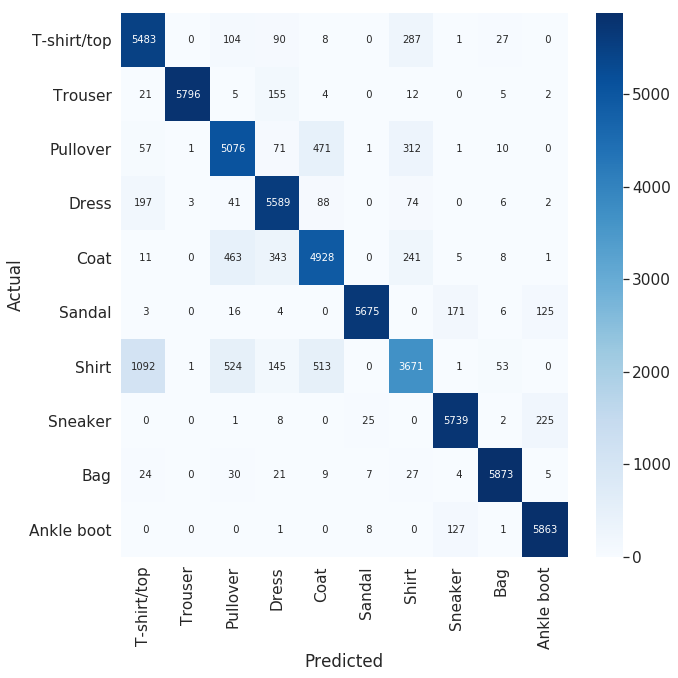

In [208]:
plt.figure(figsize=(10,10))
sn.set(font_scale=1.4) #for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 10},fmt='3g')# font size

### Not nije (better)

https://deeplizard.com/learn/video/0LhiS6yu2qQ

In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5483    0  104   90    8    0  287    1   27    0]
 [  21 5796    5  155    4    0   12    0    5    2]
 [  57    1 5076   71  471    1  312    1   10    0]
 [ 197    3   41 5589   88    0   74    0    6    2]
 [  11    0  463  343 4928    0  241    5    8    1]
 [   3    0   16    4    0 5675    0  171    6  125]
 [1092    1  524  145  513    0 3671    1   53    0]
 [   0    0    1    8    0   25    0 5739    2  225]
 [  24    0   30   21    9    7   27    4 5873    5]
 [   0    0    0    1    0    8    0  127    1 5863]]


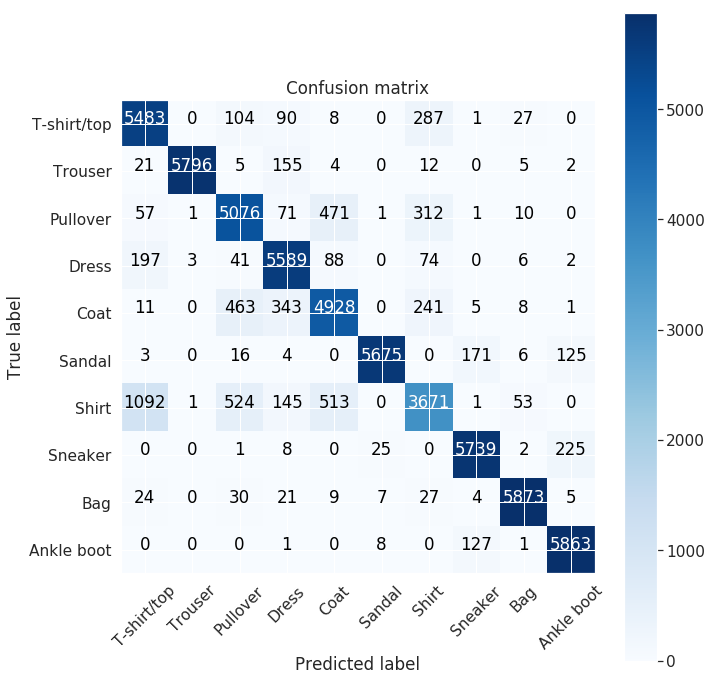

In [209]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm,names)